# Simulation und Modellierung WS17/18 - Uebung 08

### Aufgabe 1 : Oberflaechen Plots

Wenn sich die Punkte $\vec{r}=\vec{r}(p,q)$ einer Flaeche als Funktion von zwei verallgemeinerten Koordinaten $p\in[p_{min},p_{max}]$ sowie $q\in[q_{min},q_{max}]$ parametrisieren lassen, dann kann man diese Flaeche in einem 3-dimensionalen `mplot3d` Plot darstellen.
```python
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

Lp = 200
Lq = 200
p = np.linspace(pmin,pmax,Lp)
q = np.linspace(qmin,qmax,Lq)

P,Q = np.meshgrid(p,q) # (P[i,j],Q[i,j]) = (p[i],q[j])

x = calculate_x(P,Q) # x[i,j] = x(p[i],q[j])
y = calculate_y(P,Q)
z = calculate_z(P,Q)

fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_surface(x,y,z,rstride=...,cstride=...)    # oder plot_wireframe(...)


ax3d.set_xlim(...) # man sollte moeglichst gleich grosse Koordinatenbereiche waehlen,
ax3d.set_ylim(...) # um Verzerrungen bei der Darstellung zu vermeiden
ax3d.set_zlim(...)

# Plotaufbereitung

show()
```

Finden Sie geeignete Parametrisierungen der folgenden Flaechen, und plotten diese in 3d als Wireframe- oder Surface Plots mit geeigneter Farbskala `cmap` oder individuellen `facecolors` :

- Kugeloberflaeche
- Torus 
- <a href="https://en.wikipedia.org/wiki/M%C3%B6bius_strip">Moebiusband</a>


**Zusatzaufgabe :** Schreiben Sie eine Funktion `Tknot(p,q,R=2,r=1,h=0.1,Lp=200,Lq=200)`, welche einen Schlauch um einen<a href="">`(p,q)` Torusknoten</a> auf einem Torus mit Radius `R`, Torusschlauchradius `r` und Torusknotenschlauchradius `h` zeichnet. (Der 1d Torusknoten hat nur eine verallgemeinerte Koordinate. Die andere parametrisiert einen senkrechten Ring in Abstand `h` um den Torusknoten)

In [1]:
from pylab import *
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D # for 3d axes

<IPython.core.display.Javascript object>


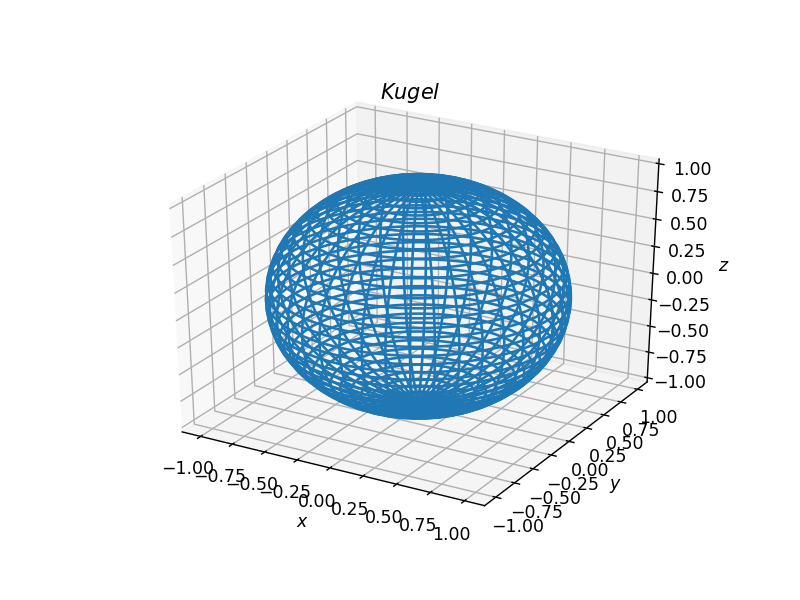

In [20]:
# Aufgabe 1: Kugel
alpha = np.linspace(0,pi,200)                       # Vektor Alpha mit 200 Werten von 0 bis pi
beta = np.linspace(0,2*pi,200)                      # Vektor Beta mit 200 Werten von 0 bis 2*pi
Alpha, Beta = np.meshgrid(alpha,beta)               # erstellt 2D Vektoren Alpha und Beta


X = sin(Alpha) * cos(Beta)                          # Parametrisierung der Kugel
Y = sin(Alpha) * sin(Beta)
Z = cos(Alpha)

fig = figure('3D function wireframe plot')          # plotten der Kugel in der 3D-Umgebung
ax = fig.add_subplot(111,projection='3d')
wf = ax.plot_wireframe(X,Y,Z,rstride=5,cstride=5)
ax.set_xlabel('$x$',fontsize=10)
ax.set_ylabel('$y$',fontsize=10)
ax.set_zlabel('$z$',fontsize=10)
ax.set_title('$Kugel$')
show()

<IPython.core.display.Javascript object>


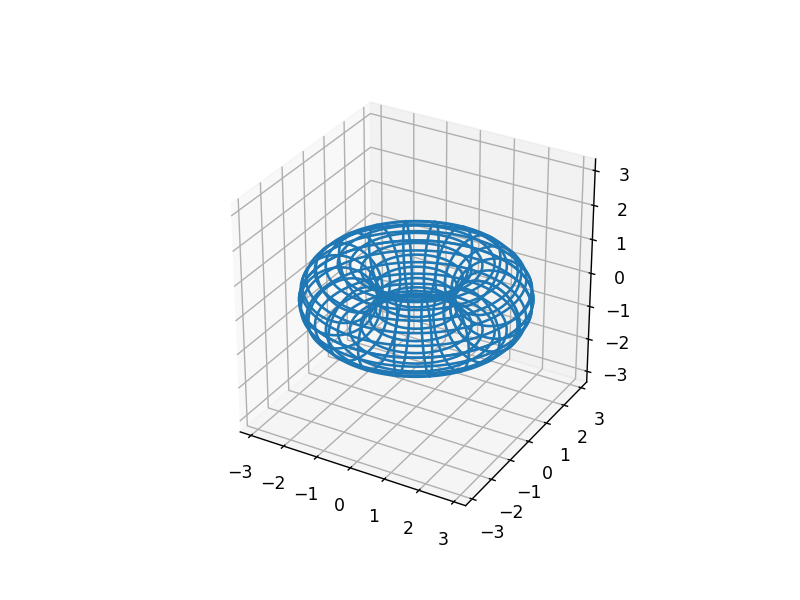

In [30]:
# Aufgabe 1: Torus
rad = np.linspace(0,2*pi,200)                        # Vektor rad mit 200 Werten von 0 bis 2*pi
wink = np.linspace(0,2*pi,200)                       # Vektor wink mit 200 Werten von 0 bis 2*pi

R = 2                                                # Strecke von der Mitte des Torus bis zur Mitte des Schlauches
r = 1                                                # Radius des Schlauches

Rad, Wink = np.meshgrid(rad,wink)                    # erstellt 2D Vektoren Rad und Wink

X = (R + r*cos(Rad))*cos(Wink)                       # Parametrisierung des Torus
Y = (R + r*cos(Rad))*sin(Wink) 
Z = r*sin(Rad)

fig=figure()                                         # plotten des Torus
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_wireframe(X,Y,Z,rstride=10,cstride=10)
ax3d.set_xlim(-(R+r+0.2),(R+r+0.2))
ax3d.set_ylim(-(R+r+0.2),(R+r+0.2))
ax3d.set_zlim(-(R+r+0.2),(R+r+0.2))
ax.set_xlabel('$x$',fontsize=10)
ax.set_ylabel('$y$',fontsize=10)
ax.set_zlabel('$z$',fontsize=10)
ax.set_title('$Torus$')
show()

<IPython.core.display.Javascript object>


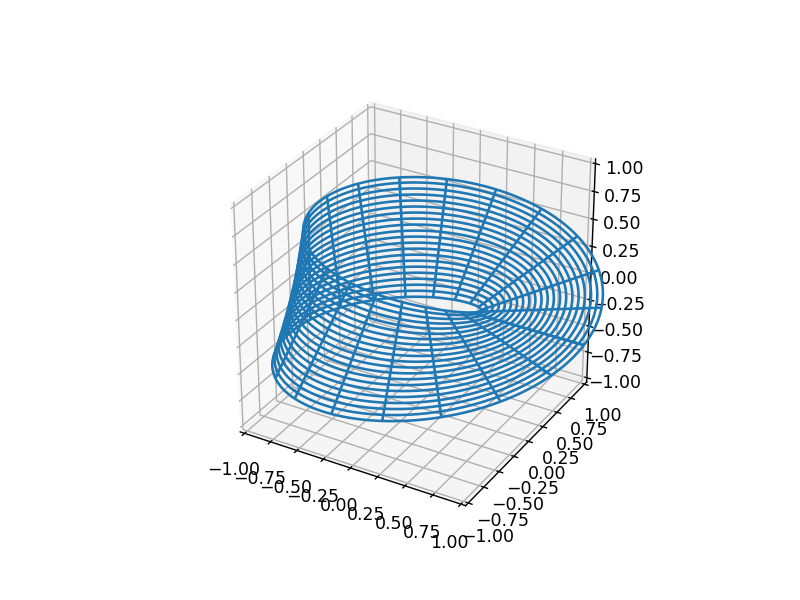

In [8]:
# Aufgabe 1: Möbius-Band
rad = np.linspace(-1,1,200)                        # Vektor rad mit 200 Werten von -1 bis 1
wink = np.linspace(0,2*pi,200)                     # Vektor rad mit 200 Werten von 0 bis 2*pi

Rad, Wink = np.meshgrid(rad,wink)                  # erstellt 2D Vektoren Rad und Wink

X = cos(Wink) * (1 + (Rad/2) * cos(Wink/2))        # Parametrisierung des Möbius-Bandes
Y = sin(Wink) * (1 + (Rad/2) * cos(Wink/2))
Z = (Rad/2) * sin(Wink/2)

fig=figure()                                       # plotten des Möbius-Bandes
ax3d=fig.add_subplot(111,projection='3d',aspect=1)
ax3d.plot_wireframe(X,Y,Z,rstride=10,cstride=10)
ax3d.set_xlim(-1,1)
ax3d.set_ylim(-1,1)
ax3d.set_zlim(-1,1)
ax.set_xlabel('$x$',fontsize=10)
ax.set_ylabel('$y$',fontsize=10)
ax.set_zlabel('$z$',fontsize=10)
ax.set_title('$Möbius-Band$')
show()

<IPython.core.display.Javascript object>


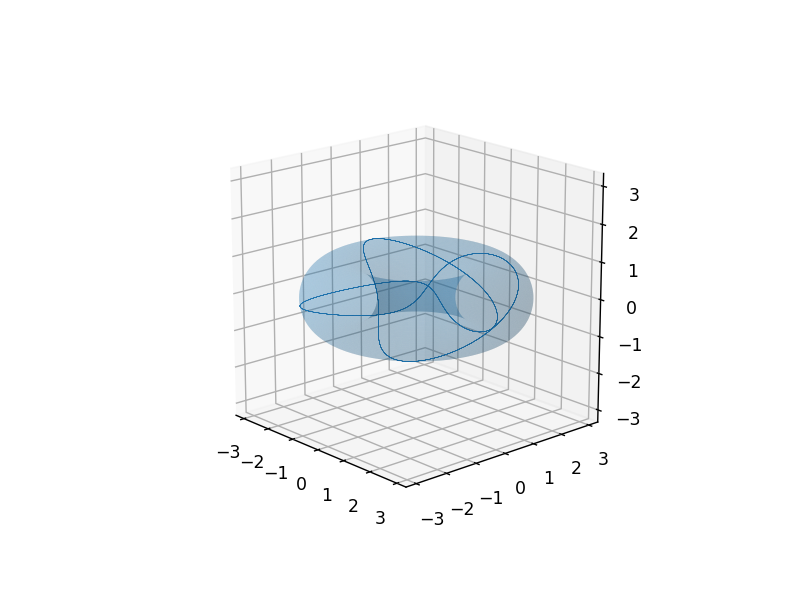

In [34]:
# Aufgabe 1 (Zusatz): Torus-Knoten
def Tknot(p,q,R=2,r=1,h=0.1,Lp=200,Lq=200,torus=False):

    phi = np.linspace(0,2*pi,200)                        # Vektor phi mit 200 Werten von 0 bis 2*pi
    th = np.linspace(0,2*pi,200)                         # Vektor th mit 200 Werten von 0 bis 2*pi 

    Phi, Th = np.meshgrid(phi,th)                        # erstellt 2D Vektoren Rad und Wink 
    
    X = (R+r*cos(p*Phi))*cos(q*Phi)                      # Parametrisierung des Torus-Knoten
    Y = (R+r*cos(p*Phi))*sin(q*Phi) 
    Z = r*sin(p*Phi)  

    fig=figure()                                                  # plotten des Torus-Knoten
    ax3d=fig.add_subplot(111,projection='3d',aspect=1)
    ax3d.plot_wireframe(X,Y,Z,rstride=10,cstride=10, linewidth=h)
 
    if torus == True:                                     # plottet den entsprechenden Torus zum Torus-Knoten 
        torus = ax3d.plot_surface((R+r*cos(Th))*cos(Phi),(R+r*cos(Th))*sin(Phi),r*sin(Th),rstride=2,cstride=2,linewidth=0.1,alpha=0.2)

    ax3d.set_xlim(-(R+r+0.2),(R+r+0.2))
    ax3d.set_ylim(-(R+r+0.2),(R+r+0.2))
    ax3d.set_zlim(-(R+r+0.2),(R+r+0.2))
    ax3d.set_aspect(1)
    show()
    
Tknot(3,2,torus=True)                                   # Beispiel Toru-Knoten

### Aufgabe 2 : Newton Fraktale

- Schreiben Sie eine Funktion `Newton_Steps(x0,f,fprime,dmin=1e-15,dmax=1e3,Nmax=100)` welche das Newton Verfahren mit der Funktion `f(x)` und deren Ableitung `fprime(x)` beginnend bei $x_0$ solange ausfuehrt bis $\left|f(x_n)\right|\le d_{min}$, $\left|f(x_n)\right|\ge d_{max}$ oder $n=N_{max}$ und den Wert $x_n$ der Nullstellen-Naeherung sowie die Zahl $n$ der notwendigen Iterationsschritte ausgibt.

- Bestimmen Sie fuer alle *komplexen* Anfangswerte $z =x+iy $ auf einem geeigneten Gitter die Approximation der von dort gefundenen Nullstellen der Funktion $f(z)=z^3-1$ und die Zahl der benoetigten Iterationsschritte. Berechnen Sie aus diesen Werten geeignete `[r,g,b]` Farben oder eine skalare Funktion und plotten Sie diese mit `imshow` ueber dem Gitter.

Hinweis : Wenn Sie die Funktionen `Newton_Steps`, `f` und `fprime` sorgfaeltig programmieren, koennen diese direkt auf ein ganzes `numpy` Feld von Anfangswerten gleichzeitig angewendet werden ohne Python Schleifen zu verwenden.

In [21]:
# Newton_Steps ermittelt mittels des Newton-Verfahrens Nullstellen einer eindimensionalen Funktion mit reeller
# Variable in der Nähe des Punktes x0

def Newton_Steps(x0,f,fprime,dmin=1e-15,dmax=1e3,Nmax=100):
    n = 0
    nullx = x0                                                   # Anfangswert x0
    nully = f(nullx)                                             # Anfangs-Y-Wert
    while abs(nully) > dmin and abs(nully) < dmax and n <= Nmax: # Newtonverfahren wird solange durchgeführt bis der 
        nullx = nullx - (f(nullx)/fprime(nullx))                 # y-Wert dmax überschreitet, das Newton-verfahren Nmax-mal 
        nully = f(nullx)                                         # durchgeführt wurde oder der Unterschied des Y-Wertes 
                                                                 # kleiner ist als die Maschinengenauigkeit
        n = n + 1
        
    return (nullx,n)                                             # gibt x-Wert und Anzahl der Iterationen aus

<IPython.core.display.Javascript object>


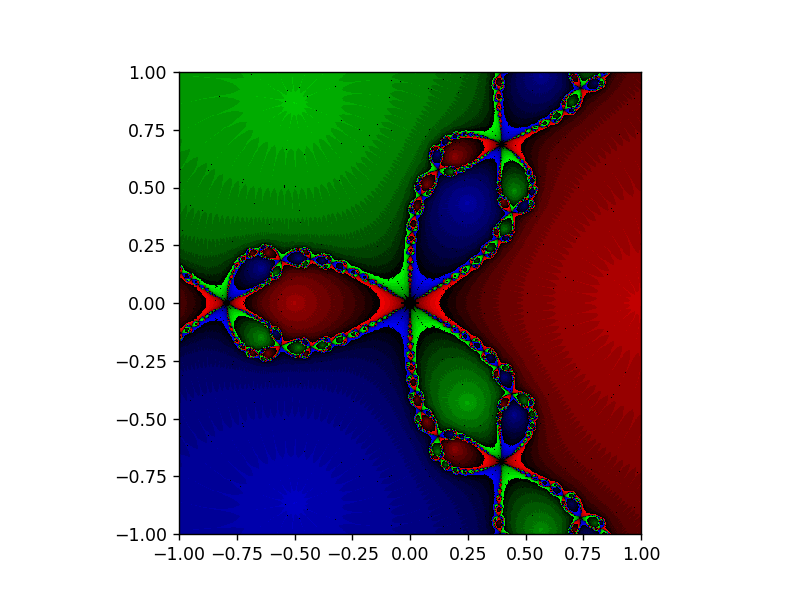

In [29]:
# Aufgabe 2: Fraktal zu f(z) = z**3 - 1

def f(z):                                        # definiert die Funktion f(z)               
    return z**3 - 1.0

ngx=-1                                           # Legt Grenzen fest
pgx=1                                            #
ngy=-1                                           # 
pgy=1                                            # 

N=500                                            # Anzahl an Werten zwischen den Grenzen
eps=1e-5                                         # Genauigkeit, die zur Null erreicht werden muss 
h=1e-5                                           # h für den Differenzenquotienten
maxIt=20                                         # Maximale Anzahl der Itterationen
M = np.zeros((N,N,3))                            # Erstellt die zunächst leere Matrix die später geplottet wird
a = linspace(ngx,pgx,N)                          # reelle Achse
b = linspace(ngy,pgy,N)                          # imaginäre Achse
for i in range(0,N):                             # geht die Werte der reellen - Achse durch
    for j in range(0,N):                         # geht die Werte der imaginären - Achse durch
        n = 0                                    # Zahl der Iterationen
        z = complex(a[i],b[j])                   # Komplexe Zahl, abhängig von reeller und imaginärer Achse
        pruefr = f(z).real                       # Realteil f(z)
        pruefi = f(z).imag                       # imaginärteil f(z)
        while abs(pruefr) > eps and abs(pruefi) > eps and n <= 20:  # Newtonverfahren wird durchgeführt bis sowohl
                                                                    # real als auch ImaginärTeil +- eps von Null entfernt
                                                                    # sind, oder die Zahl der Iterationen 20 übersteigt
            dz = (f(z + complex(h,h)) - f(z)) / complex(h,h)        # Ableitung von f(z) mit komplexen Differenzenquotient
            z0 = z - f(z)/dz                                        # Bildungsvorschrift für z0
            n = n + 1                                               
            z = z0 
            pruefr = f(z).real                                      # neu Berechnung der Prüf-variablen 
            pruefi = f(z).imag
       
        n1r = z.real - 1                                            # Vergleich der Komplexen Anfangszahl mit den drei
        n1i = z.imag - 0                                            # möglichen Nullstellen
        n2r = z.real - cos(2*pi/3)
        n2i = z.imag - sin(2*pi/3)
        n3r = z.real - cos(4*pi/3)
        n3i = z.imag - sin(4*pi/3)
        
        if abs(n1r) < 1e-3 and  abs(n1i) < 1e-3:                    # Abhängig davon zu welcher Nullstelle z konvergiert
            M[j,i,0] = (maxIt+1)/(1/(n + 1))                        # wird der Punkt eingefärbt. Je mehr iterationen
            M[j,i,1] = 0                                            # gebraucht wurden, desto dunkler wird der Punkt
            M[j,i,2] = 0                                            # Divergiert der Punkt, wird er schwarz gefärbt
        elif abs(n2r) < 1e-3 and  abs(n2i) < 1e-3:
            M[j,i,0] = 0
            M[j,i,1] = (maxIt+1)/(1/(n + 1))
            M[j,i,2] = 0
        elif abs(n3r) < 1e-3 and  abs(n3i) < 1e-3:
            M[j,i,0] = 0
            M[j,i,1] = 0
            M[j,i,2] = (maxIt+1)/(1/(n + 1))
        else: 
            M[j,i,0] = 0
            M[j,i,1] = 0
            M[j,i,2] = 0

plt.imshow(M,interpolation='none',origin='lower',extent=[ngx,pgx,ngy,pgy]) # plottet das Fraktal
show()

#### Zusatzaufgabe :

- Definieren Sie eine Funktion `polymaker(c)` welche bei einem gegebenen iterierbaren Container `c` mit Nullstellen $c_i$ die Funktion `f(x)`$=\prod_i (x-c_i)$ und deren Ableitung `fprime(x)`$=\sum_i \prod_{j\ne i} (x-c_j)$ dynamisch generiert und als Funktionsobjekte zurueckliefert.

- Plotten Sie Beispiele fuer Newton Fraktale von verschiedenen Funktionen, die Sie mit `polymaker(c)` erzeugen.

**frohe Weihnachtsferien!**

In [ ]:
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

nb = 80           # number of ornamental balls
sb = 40           # size of onramental balls

ns = 100          # number of snow flakes
ms = 'w*'         # marker color and shape of snow flakes
alpha_snow=0.5    # alpha value of snow flakes

alpha_tree=0.8    # alpha value for tree surface



Lh = 100
Lphi = 100
h = np.linspace(0,1,Lh)
phi = np.linspace(0,2*pi,Lphi)
H,PHI = np.meshgrid(h,phi)                #meshgrid of cylinder coordinates

fig=figure()
ax3d=fig.add_subplot(111,projection='3d',aspect=1)

#tree trunk
ax3d.plot_surface(cos(PHI)*0.2,sin(PHI)*0.2,H,rstride=5,cstride=5,color=[0.3,0.1,0],linewidth=0,alpha=alpha_tree) 

#branch cones
ax3d.plot_surface((2-H)*cos(PHI),(2-H)*sin(PHI),1+2*H,rstride=5,cstride=5,color=[0,0.5,0],linewidth=0,alpha=alpha_tree) 
ax3d.plot_surface(0.7*(2-H)*cos(PHI),0.7*(2-H)*sin(PHI),3+1.5*H,rstride=5,cstride=5,color=[0,0.5,0],linewidth=0,alpha=alpha_tree)
ax3d.plot_surface((1-H)*cos(PHI),(1-H)*sin(PHI),4.5+1.5*H,rstride=5,cstride=5,color=[0,0.5,0],linewidth=0,alpha=alpha_tree)

#ornamental ball positions (cylinder coordinates) and colors
hn = np.random.random(nb)
pn = np.random.random(nb)*2*pi
cn = np.random.random((nb,3))
ax3d.scatter3D(1.5*(1.3-hn)*cos(pn),1.5*(1.3-hn)*sin(pn),1+5*hn,s=40,c=cn)


#snow positions and velocities
snox = np.random.random(ns)*6-3
snoy = np.random.random(ns)*6-3
snoz = np.random.random(ns)*6
snov = -np.random.random(ns)*0.01
mysnow, = ax3d.plot3D(snox,snoy,snoz,ms,alpha=alpha_snow)

ax3d.set_xlim(-3,3)
ax3d.set_ylim(-3,3)
ax3d.set_zlim(0,6)
axis('off')

def animate(i):
    global snox,snoy,snoz
    snoz=mod(snoz+snov,6)
    snox=mod(snox+3+np.random.randn(ns)*0.01,6)-3
    snoy=mod(snoy+3+np.random.randn(ns)*0.01,6)-3
    mysnow.set_data(snox,snoy)
    mysnow.set_3d_properties(snoz) # 3D Plots have no set_zdata(...) function
    return None
    
def init():
    return None

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=1, blit=True)

show()